In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

def visualize_ecg_segment(ecg_data, qrs_positions, start_idx, window_length, figsize=(12, 6)):
    """Helper function to visualize a segment of ECG data"""
    total_length = len(ecg_data)
    end_idx = min(start_idx + window_length, total_length)
    
    # Extract the window data to display
    window_data = ecg_data.iloc[start_idx:end_idx]
    
    # Convert to numpy arrays
    time_values = window_data['time'].to_numpy()
    voltage_values = window_data['voltage'].to_numpy()
    
    # Get time range of the window
    window_start_time = time_values[0] if len(time_values) > 0 else 0
    window_end_time = time_values[-1] if len(time_values) > 0 else 0
    
    # Filter QRS positions to only those within the display window
    window_qrs_positions = [pos for pos in qrs_positions 
                          if window_start_time <= pos <= window_end_time]
    
    # Create figure and plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot the ECG signal
    ax.plot(time_values, voltage_values, 'b-', label='ECG Signal')
    
    # Get voltage values at QRS positions
    qrs_voltages = []
    for pos in window_qrs_positions:
        # Find the closest time in our time array
        closest_idx = np.abs(time_values - pos).argmin()
        qrs_voltages.append(voltage_values[closest_idx])
    
    # Plot detected QRS positions
    ax.scatter(window_qrs_positions, qrs_voltages, color='red', s=50, 
              label='Detected QRS', zorder=5)
    
    # Set labels and title
    time_range = f"{window_start_time:.2f}s - {window_end_time:.2f}s"
    current_percentage = start_idx / total_length * 100
    end_percentage = end_idx / total_length * 100
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Voltage')
    ax.set_title(f'ECG with QRS Complex Detection ({time_range})')
    
    # Add percentage information
    info_text = f"Showing samples {start_idx:,} - {end_idx:,} of {total_length:,} "
    info_text += f"({current_percentage:.1f}% - {end_percentage:.1f}%)"
    fig.text(0.5, 0.01, info_text, ha='center', fontsize=9)
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    return start_idx, window_length

def navigate_ecg(ecg_file_path, positions_file_path, window_length=5000):
    """
    Simple interactive ECG navigation using function-based approach.
    
    Parameters:
    -----------
    ecg_file_path : str
        path to the CSV file containing ECG data (time, voltage)
    positions_file_path : str
        path to the text file containing QRS positions
    window_length : int
        number of samples to display in one view
    """
    # Reading ECG data
    ecg_data = pd.read_csv(ecg_file_path)
    total_length = len(ecg_data)
    
    # Reading QRS positions
    with open(positions_file_path, 'r') as f:
        qrs_positions = [float(line.strip()) for line in f if line.strip()]
    
    # Initialize position
    current_position = 0
    
    # Display instructions
    print("ECG Navigation Controls:")
    print("- Enter 'n' or 'next' to move forward")
    print("- Enter 'p' or 'prev' to move backward")
    print("- Enter 'j X' to jump to position X (percentage, e.g., 'j 50' for 50%)")
    print("- Enter 'w X' to change window size to X samples")
    print("- Enter 'q' or 'quit' to exit")
    print("\nInitial view:")
    
    # Show initial plot
    current_position, window_length = visualize_ecg_segment(
        ecg_data, qrs_positions, current_position, window_length
    )
    
    # Navigation loop
    while True:
        # Get user command
        cmd = input("\nEnter navigation command: ").strip().lower()
        
        if cmd in ('q', 'quit', 'exit'):
            print("Exiting navigation.")
            break
            
        elif cmd in ('n', 'next'):
            # Move forward
            new_position = min(total_length - window_length, current_position + window_length)
            if new_position == current_position:
                print("Already at the end of the ECG.")
            else:
                current_position = new_position
                
        elif cmd in ('p', 'prev'):
            # Move backward
            new_position = max(0, current_position - window_length)
            if new_position == current_position:
                print("Already at the beginning of the ECG.")
            else:
                current_position = new_position
                
        elif cmd.startswith('j '):
            # Jump to percentage
            try:
                percentage = float(cmd.split()[1])
                if 0 <= percentage <= 100:
                    current_position = int((percentage / 100) * (total_length - window_length))
                else:
                    print("Percentage must be between 0 and 100.")
            except (ValueError, IndexError):
                print("Invalid jump command. Use 'j X' where X is a percentage.")
                
        elif cmd.startswith('w '):
            # Change window size
            try:
                new_window = int(cmd.split()[1])
                if 10 <= new_window <= total_length:
                    window_length = new_window
                    if current_position + window_length > total_length:
                        current_position = total_length - window_length
                else:
                    print(f"Window size must be between 10 and {total_length}.")
            except (ValueError, IndexError):
                print("Invalid window command. Use 'w X' where X is number of samples.")
                
        else:
            print("Unknown command. Try 'n', 'p', 'j X', 'w X', or 'q'.")
            continue
        
        # Clear previous output and show updated plot
        clear_output(wait=True)
        print("ECG Navigation Controls:")
        print("- Enter 'n' or 'next' to move forward")
        print("- Enter 'p' or 'prev' to move backward")
        print("- Enter 'j X' to jump to position X (percentage, e.g., 'j 50' for 50%)")
        print("- Enter 'w X' to change window size to X samples")
        print("- Enter 'q' or 'quit' to exit")
        
        current_position, window_length = visualize_ecg_segment(
            ecg_data, qrs_positions, current_position, window_length
        )

# Usage in a Jupyter notebook:
# navigate_ecg('ecg.csv', 'positions.txt')

ECG Navigation Controls:
- Enter 'n' or 'next' to move forward
- Enter 'p' or 'prev' to move backward
- Enter 'j X' to jump to position X (percentage, e.g., 'j 50' for 50%)
- Enter 'w X' to change window size to X samples
- Enter 'q' or 'quit' to exit


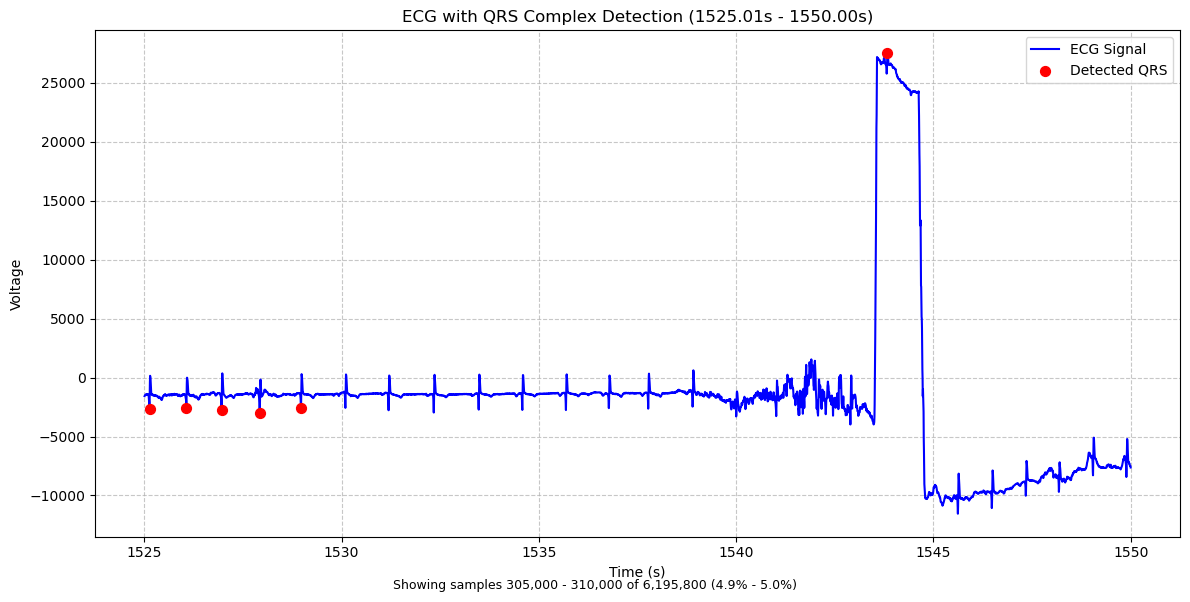


Enter navigation command: q
Exiting navigation.


In [32]:
navigate_ecg('ecg.csv', 'positions.txt')